### THE SPARKS FOUNDATION - INTERNSHIP
### DOMAIN: DATA SCIENCE AND BUSINESS ANALYTICS
### AUTHOR: MUHAMMAD DANISH  MUNIR

### PREDICTION USING SUPERVISED MACHINE LEARNING

# TASK: House Price Prediction

Data Set Information

#### Title:  Boston Housing Data

Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollar
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

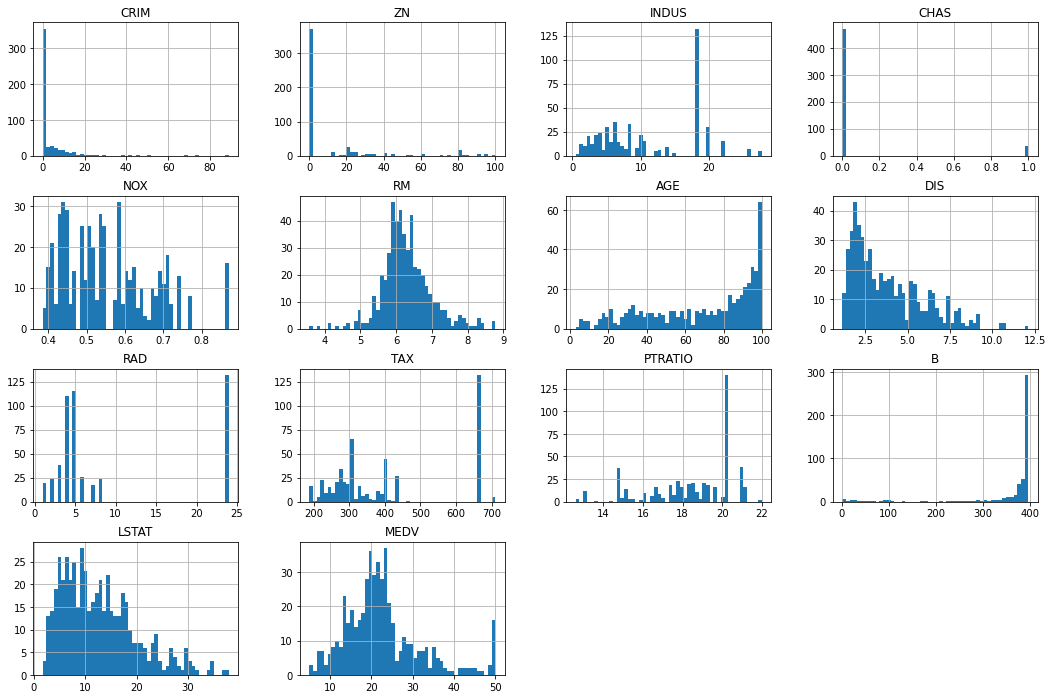

In [9]:
housing.hist(bins=50, figsize=(18,12))
plt.show()

# Correlation

In [10]:
correlation = housing.corr()

In [11]:
correlation['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

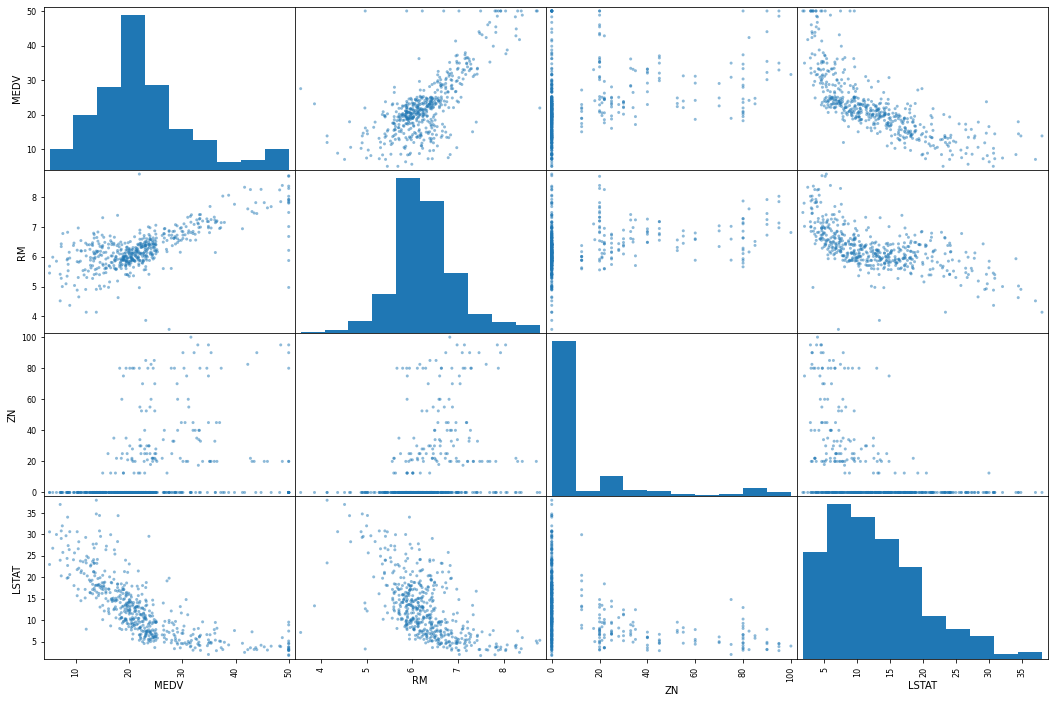

In [12]:
from pandas.plotting import scatter_matrix
features = ['MEDV','RM','ZN', 'LSTAT']
scatter_matrix(housing[features], figsize=(18,12))
plt.show()

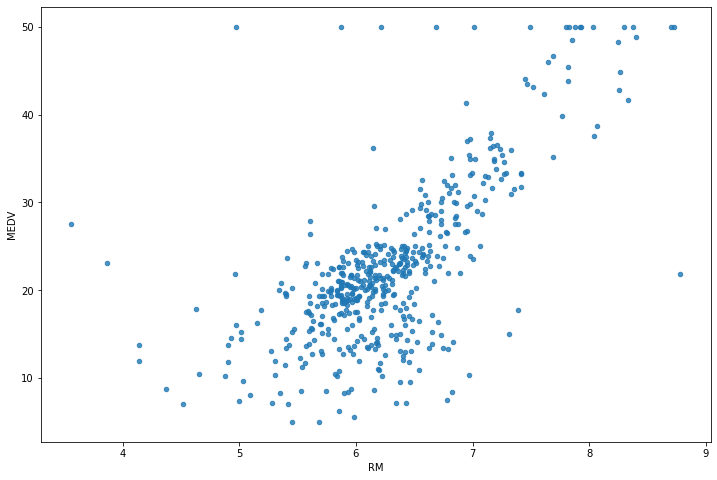

In [13]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8, figsize=(12,8))
plt.show()

# Train Test Splitting

##### Using Startified Sampling Considiring "CHAS" as important Variable

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sp = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in sp.split(housing, housing['CHAS']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [15]:
train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## Features and Lablel

In [17]:
x_train = train_set.drop("MEDV", axis=1)
x_test = test_set.drop("MEDV", axis=1)

y_train = train_set["MEDV"].copy()
y_test = test_set["MEDV"].copy()

# Model Selection

#### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [19]:
LR_predict = LR.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(LR_predict, y_test)

In [21]:
rmse1 = np.sqrt(mse1)
rmse1

4.143819554319329

#### Decision Tree Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
DT_predict = DT.predict(x_test)

In [24]:
mse2 = mean_squared_error(DT_predict, y_test)
rmse2 = np.sqrt(mse2)
rmse2

3.9488643192397364

#### GradientBoosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

GradientBoostingRegressor()

In [26]:
GB_predict = GB.predict(x_test)

In [27]:
mse3 = mean_squared_error(GB_predict, y_test)
rmse3 = np.sqrt(mse3)
rmse3

2.6857596358737847

# Cross Validation

In [28]:
# Linear Regression
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(LR, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-score1)

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [29]:
# DecisionTree Regressor
score2 = cross_val_score(DT, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-score2)

array([3.79473319, 5.63573096, 5.49556362, 4.03430412, 4.03199702,
       2.94300017, 5.1488591 , 3.79904593, 3.41661382, 4.46004484])

In [30]:
# GradientBoosting Regressor
score2 = cross_val_score(GB, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-score2)

# Consider Final Model

array([3.02148986, 2.81975012, 4.7191033 , 2.19058041, 2.96626016,
       2.58491395, 3.70836726, 3.33327493, 2.71052912, 2.33068808])

## Model Saving

In [31]:
from joblib import dump, load

In [32]:
dump(GB, 'House_Prics_Predictor.joblib')

['House_Prics_Predictor.joblib']

In [33]:
model = load('House_Prics_Predictor.joblib')

In [34]:
model.predict([[0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65]])

array([22.88130812])